<a href="https://colab.research.google.com/github/Cosmic-Nerd1/MNIST_Dataset_using_ANNs/blob/main/Mnist_Dataset_using_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape


(60000, 28, 28)

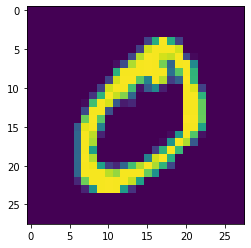

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [6]:
#Build CNN
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 256)               8448      
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 121,834
Trainable params: 121,834
Non-trai

In [8]:
#Compiler our model with loss function and with optimizers along with metrics
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam',metrics='accuracy')

In [9]:
train_model = model.fit(X_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6197 - accuracy: 0.8466 - val_loss: 0.2800 - val_accuracy: 0.9243
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2513 - accuracy: 0.9327 - val_loss: 0.2653 - val_accuracy: 0.9335
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1985 - accuracy: 0.9466 - val_loss: 0.1898 - val_accuracy: 0.9514
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1585 - accuracy: 0.9570 - val_loss: 0.1750 - val_accuracy: 0.9554
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1329 - accuracy: 0.9626 - val_loss: 0.1491 - val_accuracy: 0.9613
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1120 - accuracy: 0.9694 - val_loss: 0.1751 - val_accuracy: 0.9557
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0951 - accuracy: 0.9731 - val_loss: 0.1485 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis =1)
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.9729

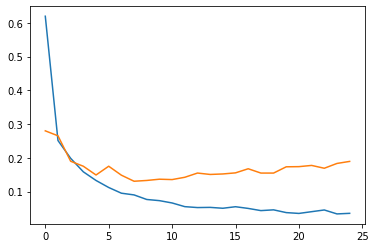

In [16]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])


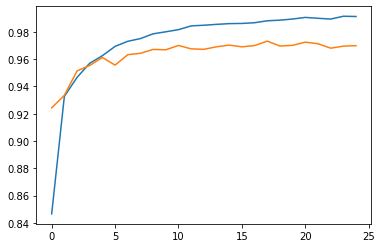

In [17]:
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])

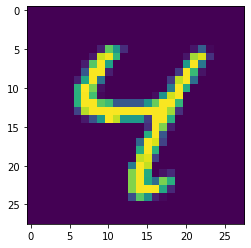

In [27]:
#Visualizing our model prediction
plt.imshow(X_test[6])

In [29]:
result = model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)
result

1/1 [==============================] - 0s 28ms/step


array([4])